In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Parametry dopasowanej prostej:
a = 2.4794
b = -3.6418


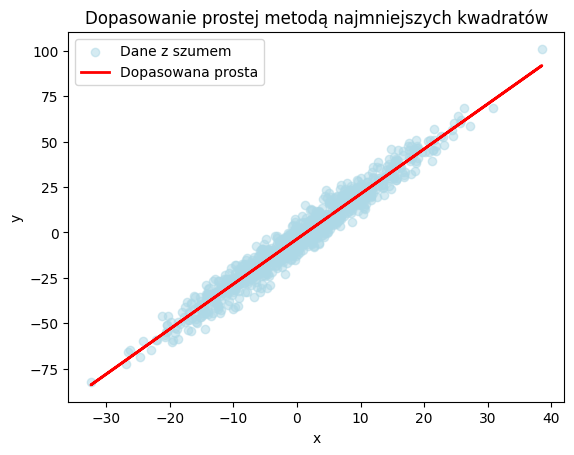

In [ ]:
# 1. Generowanie danych testowych
np.random.seed(42)  # dla powtarzalności
x = np.random.normal(0, 10, 1000)  # 1000 punktów x z rozkładu normalnego
a_true = 2.5   # rzeczywiste nachylenie
b_true = -4.0  # rzeczywisty wyraz wolny
noise = np.random.normal(0, 5, 1000)  # szum
y = a_true * x + b_true + noise       # zależność liniowa z szumem

# 2. Dopasowanie prostej metodą najmniejszych kwadratów
a_fit, b_fit = np.polyfit(x, y, 1)

print(f"Parametry dopasowanej prostej:")
print(f"a = {a_fit:.4f}")
print(f"b = {b_fit:.4f}")

# 3. Wizualizacja
plt.scatter(x, y, color='lightblue', label='Dane z szumem', alpha=0.5)
plt.plot(x, a_fit * x + b_fit, color='red', label='Dopasowana prosta', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dopasowanie prostej metodą najmniejszych kwadratów')
plt.show()

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1
Współczynnik korelacji Pearsona: -0.277
p-value: 2.0084e-03

Parametry regresji liniowej:
Nachylenie (a): -4.1846
Wyraz wolny (b): 424.5828


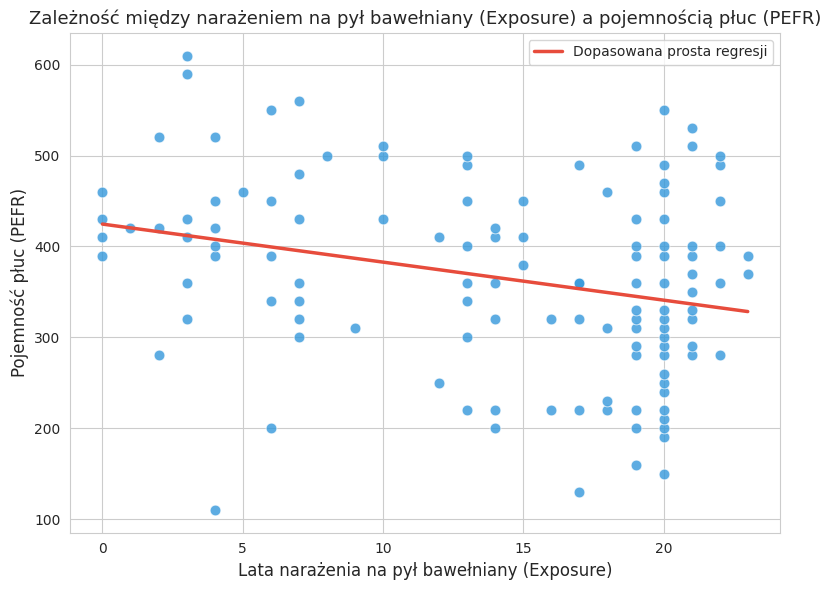


Interpretacja: PEFR maleje wraz ze wzrostem Exposure.


In [ ]:
from scipy.stats import pearsonr, linregress
df = pd.read_csv("/content/drive/MyDrive/LungDisease.csv")

print(df.head())

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df,
    x="Exposure",
    y="PEFR",
    color="#3498db",
    s=60,
    edgecolor="white",
    alpha=0.8
)

plt.title("Zależność między narażeniem na pył bawełniany (Exposure) a pojemnością płuc (PEFR)", fontsize=13)
plt.xlabel("Lata narażenia na pył bawełniany (Exposure)", fontsize=12)
plt.ylabel("Pojemność płuc (PEFR)", fontsize=12)

corr, p_value = pearsonr(df["Exposure"], df["PEFR"])
print(f"Współczynnik korelacji Pearsona: {corr:.3f}")
print(f"p-value: {p_value:.4e}")

slope, intercept, r_value, p_val, std_err = linregress(df["Exposure"], df["PEFR"])
print(f"\nParametry regresji liniowej:")
print(f"Nachylenie (a): {slope:.4f}")
print(f"Wyraz wolny (b): {intercept:.4f}")

x_vals = np.linspace(df["Exposure"].min(), df["Exposure"].max(), 100)
y_fit = slope * x_vals + intercept

plt.plot(x_vals, y_fit, color="#e74c3c", linewidth=2.5, label="Dopasowana prosta regresji")
plt.legend()
plt.tight_layout()
plt.show()

if corr < 0:
    trend = "maleje wraz ze wzrostem Exposure"
elif corr > 0:
    trend = "rośnie wraz ze wzrostem Exposure"
else:
    trend = "nie wykazuje wyraźnej zależności"

print(f"\nInterpretacja: PEFR {trend}.")


# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



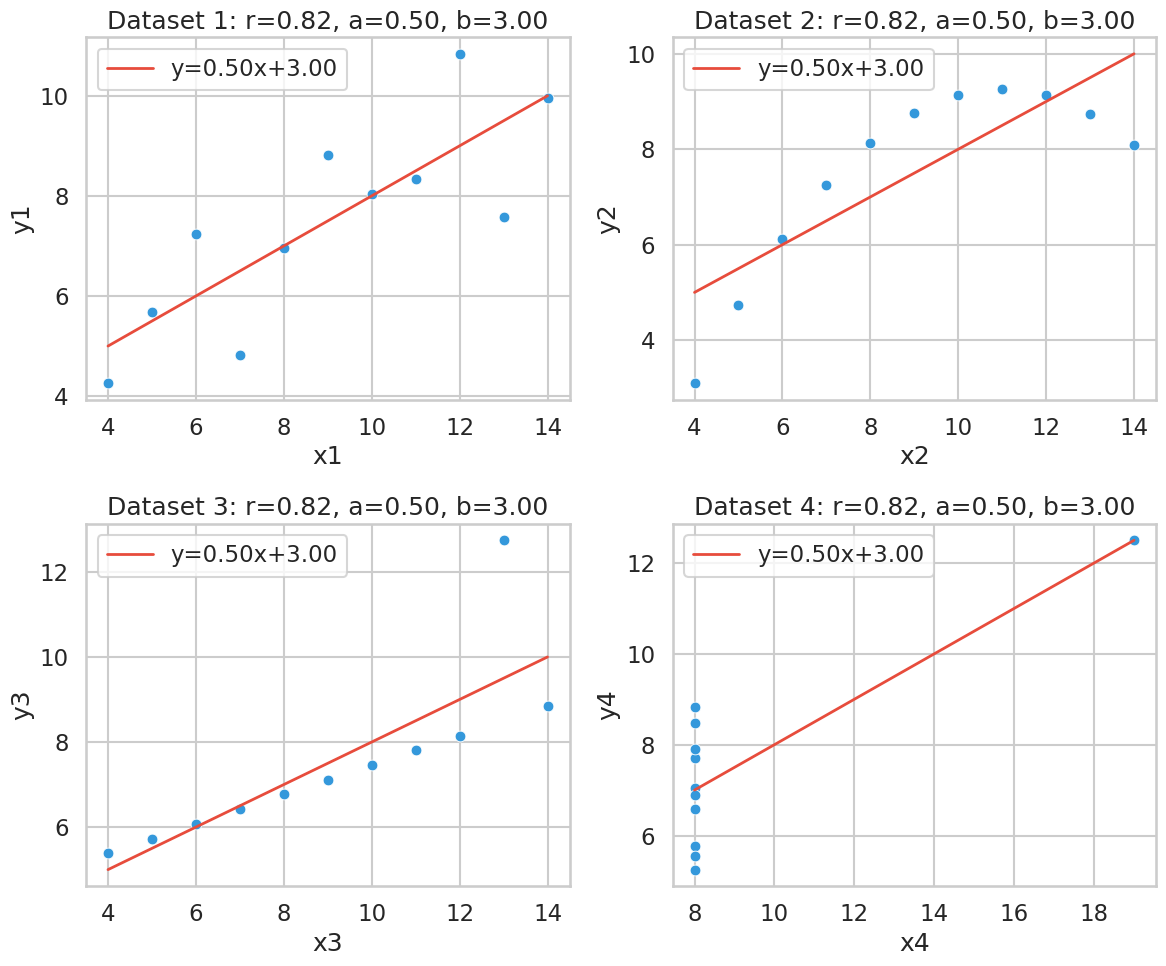

   Dataset         a         b         r   std_err
0        1  0.500091  3.000091  0.816421  0.117906
1        2  0.500000  3.000909  0.816237  0.117964
2        3  0.499727  3.002455  0.816287  0.117878
3        4  0.499909  3.001727  0.816521  0.117819


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/anscombe.csv", skiprows=2, header=None)
df.columns = ["x1","y1","x2","y2","x3","y3","x4","y4"]

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

results = []

for i in range(1, 5):
    x = df[f"x{i}"]
    y = df[f"y{i}"]

    sns.scatterplot(x=x, y=y, ax=axes[i-1], s=60, color="#3498db", edgecolor="white")

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = slope * x_fit + intercept
    axes[i-1].plot(x_fit, y_fit, color="#e74c3c", lw=2, label=f'y={slope:.2f}x+{intercept:.2f}')
    axes[i-1].legend()
    axes[i-1].set_title(f"Dataset {i}: r={r_value:.2f}, a={slope:.2f}, b={intercept:.2f}")
    axes[i-1].set_xlabel(f"x{i}")
    axes[i-1].set_ylabel(f"y{i}")

    results.append({
        "Dataset": i,
        "a": slope,
        "b": intercept,
        "r": r_value,
        "std_err": std_err
    })

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results)
print(results_df)
